In [1]:
import pandas as pd
import re

pred_dir = 'all_seq_pred'

# Load the uploaded CSV file
file_path = f'{pred_dir}/average_fibril_probability.csv'
df = pd.read_csv(file_path)
df.head()

,sequence,average_fibril_probability
0,EFKFEFKF,0.997126
1,EKEFFFFK,0.994829
2,EFKFFKFE,0.993734
3,KKFFFEFE,0.986458
4,KFKFEFEF,0.985092


In [2]:
def replace_non_f_chars(sequence):
    return ''.join(['F' if char == 'F' else '_' for char in sequence])

def adjust_pattern(pattern):
    if pattern in ["_F_F_F_F", "F_F_F_F_"]:
        return pattern
    pattern = re.sub(r'^_+', '', pattern)
    pattern = re.sub(r'_+$', '', pattern)
    return pattern

df['pattern'] = df['sequence'].apply(replace_non_f_chars)
df['pattern'] = df['pattern'].apply(adjust_pattern)


specified_patterns = [
    "FF__FF", "F_FFF", "F__FFF", "FFF_F", "FFFF", "F_F_F_F_", "_F_F_F_F"
]

positive_patterns = [
    "F_F_F_F_", "_F_F_F_F", "FFFF", "FFF_F"
]

negative_patterns = [
     "FF__FF", "F_FFF", "F__FFF"
]

In [3]:
df.head(5)

,sequence,average_fibril_probability,pattern
0,EFKFEFKF,0.997126,_F_F_F_F
1,EKEFFFFK,0.994829,FFFF
2,EFKFFKFE,0.993734,F_FF_F
3,KKFFFEFE,0.986458,FFF_F
4,KFKFEFEF,0.985092,_F_F_F_F


In [4]:
# Split the dataframe into specified and other patterns
df_specified = df[df['pattern'].isin(specified_patterns)]
df_positive = df[df['pattern'].isin(positive_patterns)]
df_negative = df[df['pattern'].isin(negative_patterns)]
df_other = df[~df['pattern'].isin(specified_patterns)]

In [5]:
import os

# define dir to save plots
save_plot_dir = 'plot_pred_probs'
os.makedirs(save_plot_dir, exist_ok=True)

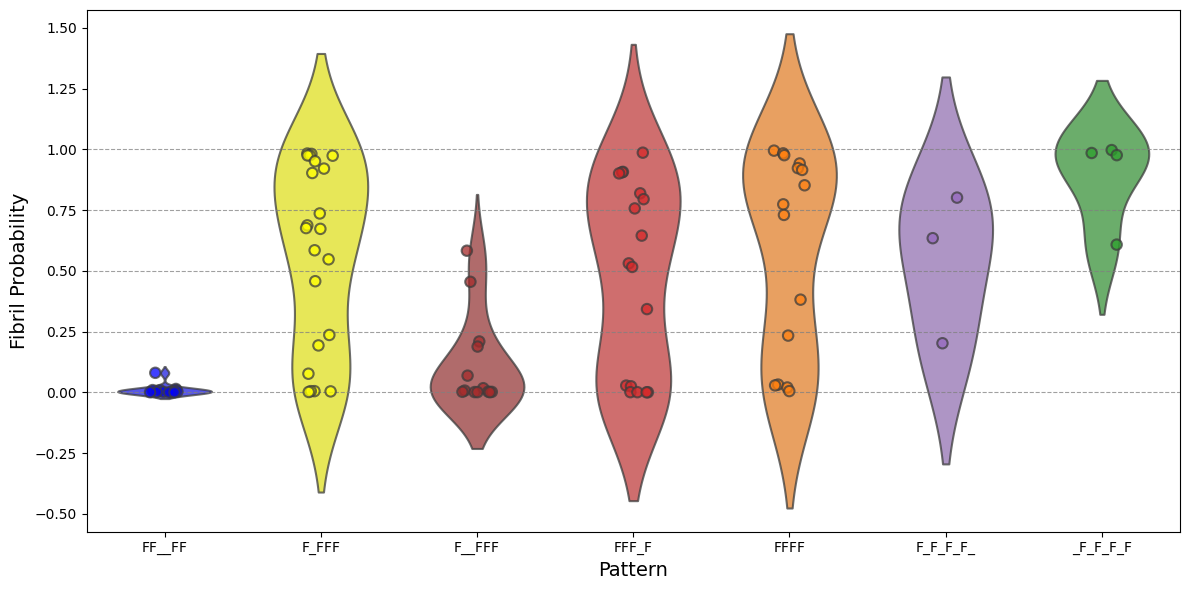

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

plt.figure(figsize=(12, 6))

custom_palette = {
    "FFFF": "#ff7f0e",     # orange
    "FFF_F": "#d62728",    # red
    "F_F_F_F_": "#9467bd", # purple
    "_F_F_F_F": "#2ca02c", # green
    "FF__FF": "blue", 
    "F_FFF": "yellow",
    "F__FFF": "brown", 
}

ax = sns.violinplot(
    x='pattern', 
    y='average_fibril_probability', 
    data=df_specified, 
    palette=custom_palette, 
    hue='pattern',
    width=0.6,
    inner=None,
    order=specified_patterns,
    linewidth=1.5 
)

sns.stripplot(
    x='pattern', 
    y='average_fibril_probability', 
    data=df_specified, 
    jitter=True,
    palette=custom_palette, 
    hue='pattern',
    order=specified_patterns,
    alpha=0.6, 
    size=7.5,    
    linewidth=1.5
)

for violin in ax.collections:
    violin.set_alpha(0.75)

for i in range(0, 101, 25):
    plt.axhline(y=i/100, color='grey', linestyle='--', linewidth=0.8, alpha=0.75)


plt.ylabel('Fibril Probability', fontsize=14)
plt.xlabel('Pattern', fontsize=14)
plt.yticks(np.arange(-0.5, 1.75, 0.25))
plt.tight_layout()
plt.savefig(f'{save_plot_dir}/violin_plot_known_patterns.pdf', format='pdf')
plt.show()

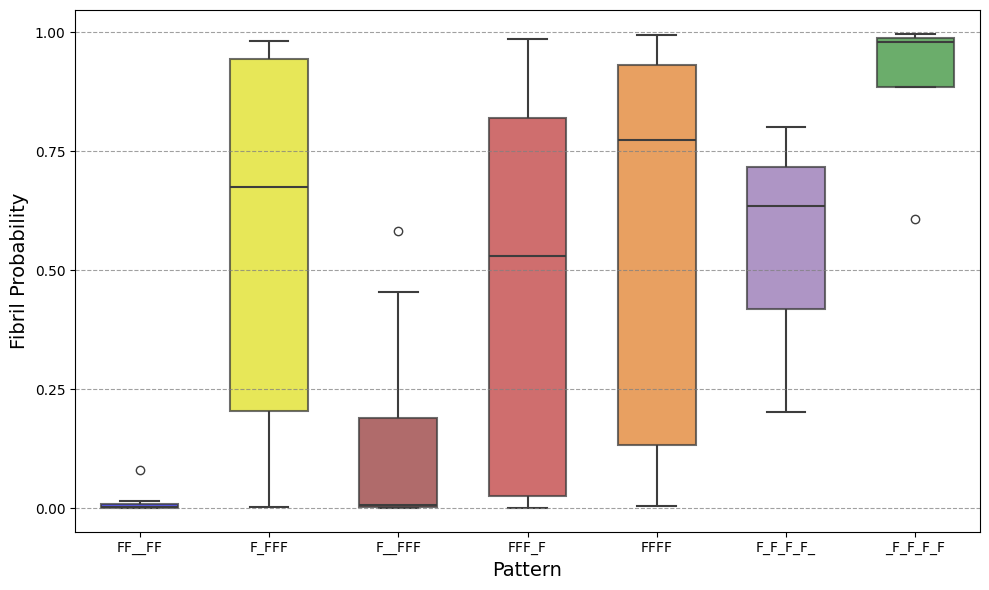

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

plt.figure(figsize=(10, 6))


boxplot = sns.boxplot(
    x='pattern', 
    y='average_fibril_probability', 
    data=df_specified, 
    palette=custom_palette, 
    hue='pattern',
    width=0.6,
        order=specified_patterns,
    linewidth=1.5 
)

for patch in boxplot.patches:
    patch.set_alpha(0.75)

for i in range(0, 101, 25):
    plt.axhline(y=i/100, color='grey', linestyle='--', linewidth=0.8, alpha=0.75)


plt.ylabel('Fibril Probability', fontsize=14)
plt.xlabel('Pattern', fontsize=14)
plt.yticks(np.arange(0, 1.25, 0.25))
plt.tight_layout()
plt.savefig(f'{save_plot_dir}/box_plot_known_patterns.pdf', format='pdf')
plt.show()


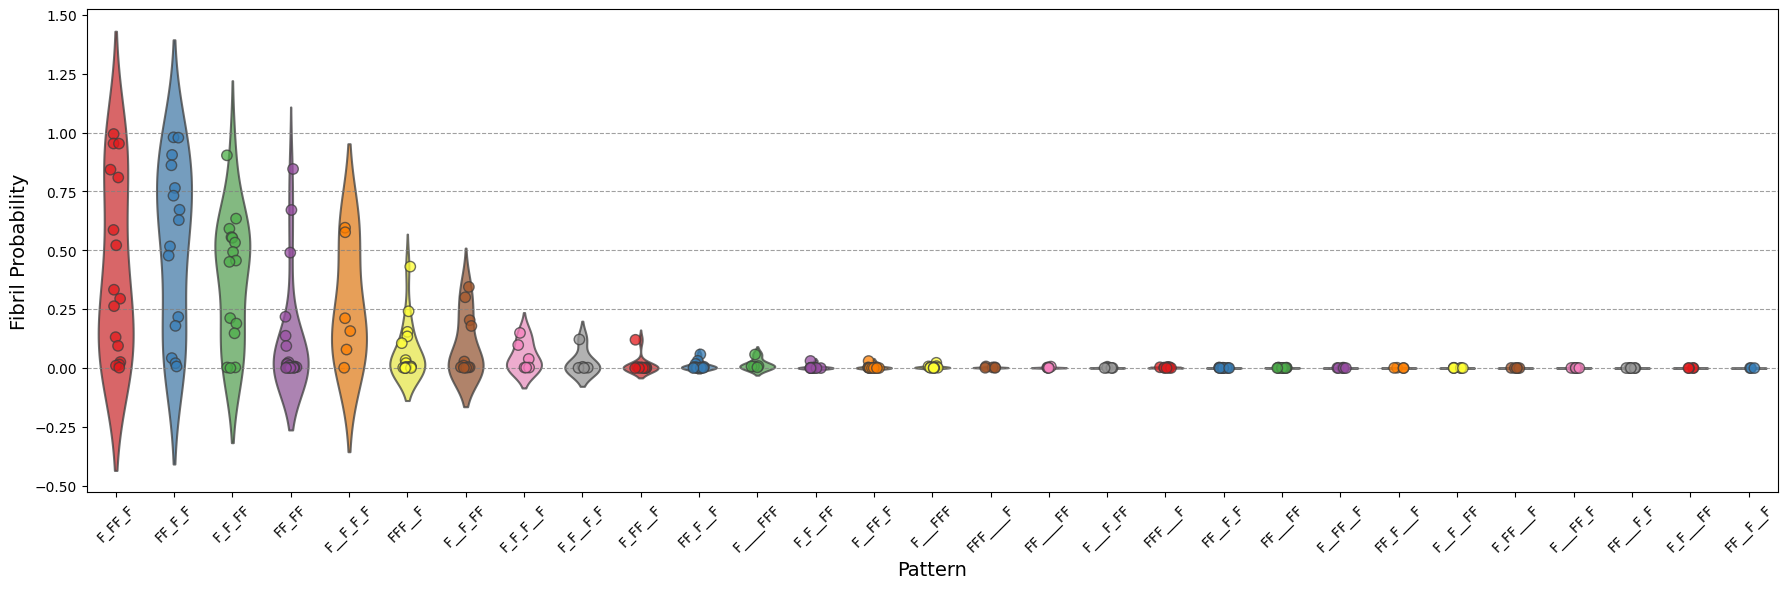

In [8]:
plt.figure(figsize=(18, 6))
ax = sns.violinplot(
    x='pattern', 
    y='average_fibril_probability', 
    data=df_other, 
    palette="Set1", 
    hue='pattern',
    inner=None,
    width=0.6,
    linewidth=1.5 
)


sns.stripplot(
    x='pattern', 
    y='average_fibril_probability',  
    data=df_other, 
    jitter=True,
    palette="Set1", 
    hue='pattern',
    alpha=0.6,  
    size=7.5,  
    linewidth=1
)

for violin in ax.collections:
    violin.set_alpha(0.75)

for i in range(0, 101, 25):
    plt.axhline(y=i/100, color='grey', linestyle='--', linewidth=0.8, alpha=0.75)


plt.xlabel('Pattern', fontsize=14)
plt.ylabel('Fibril Probability', fontsize=14) 
plt.xticks(rotation=45) 
plt.yticks(np.arange(-0.5, 1.75, 0.25))
plt.tight_layout()
plt.savefig(f'{save_plot_dir}/violin_plot_unknown_patterns.pdf', format='pdf')
plt.show()

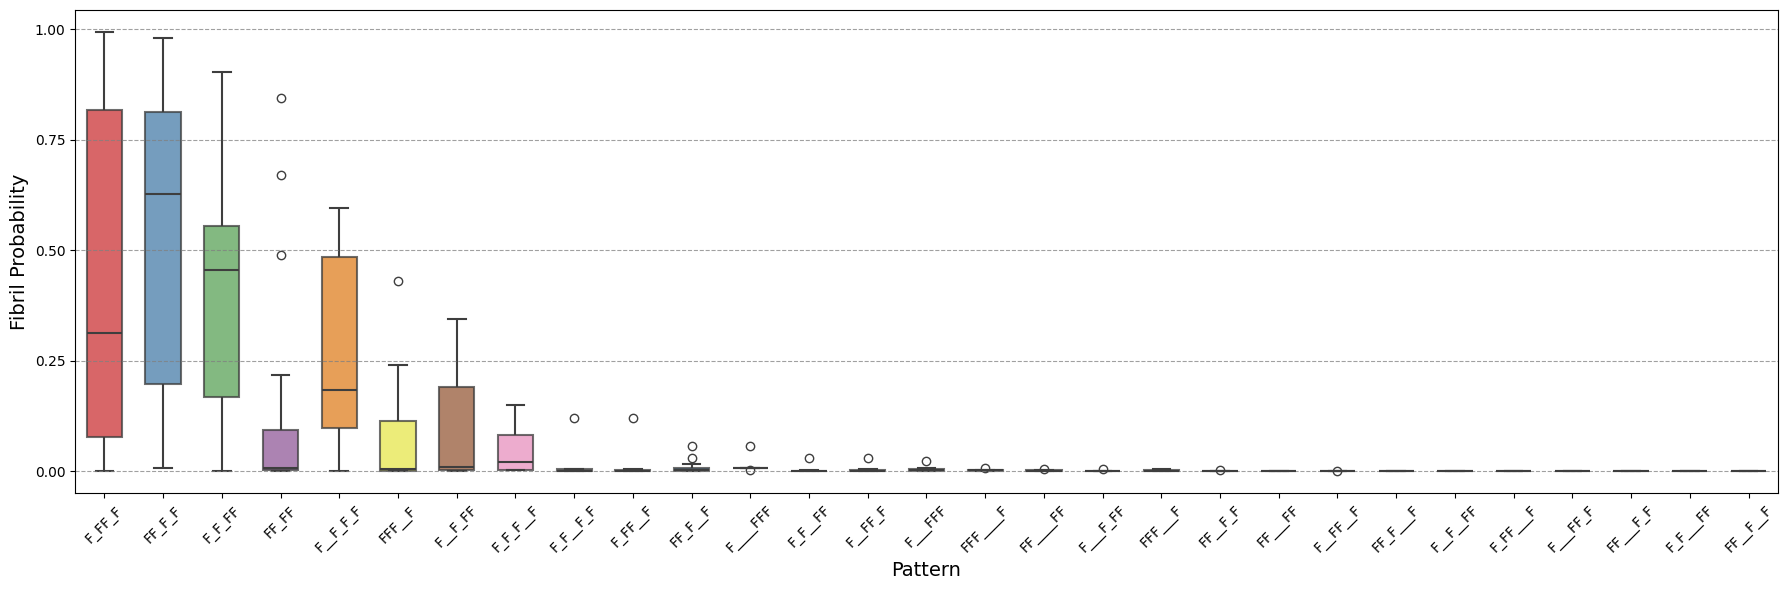

In [9]:
plt.figure(figsize=(18, 6))

boxplot = sns.boxplot(
    x='pattern', 
    y='average_fibril_probability', 
    data=df_other, 
    palette="Set1",
    hue='pattern',
    width=0.6,
    linewidth=1.5
)
for patch in boxplot.patches:
    patch.set_alpha(0.75)

for i in range(0, 101, 25):
    plt.axhline(y=i/100, color='grey', linestyle='--', linewidth=0.8, alpha=0.75)

plt.xticks(rotation=45) 
plt.xlabel('Pattern', fontsize=14)
plt.ylabel('Fibril Probability', fontsize=14) 
plt.yticks(np.arange(0, 1.25, 0.25))
plt.tight_layout()
plt.savefig(f'{save_plot_dir}/box_plot_unknown_patterns.pdf', format='pdf')
plt.show()